## Curve fitting using Neural Networks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n = 300
x = np.linspace(0,1,n)
v = (np.random.random(size=n)*0.2)-0.1
d = np.sin(20*x)+ 3*x + v
X = np.vstack((np.ones((1,n)),x))

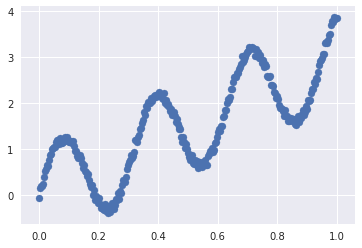

In [8]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
import matplotlib.pyplot as plt
plt.scatter(x,d)
plt.show()

The above is the original curve which we will try to find a fit using NN

In [10]:
Nepochs= 50
N = 24
W = np.random.random(size=(N,2))
U = np.random.random(size=(N,1))
u0 = np.random.random()
y = np.zeros(n)
loss = []
loss.append(np.inf)
eta = 10
for i in range(Nepochs):
    for j in range(n):
        y[j] = np.dot(np.tanh(np.dot(W,np.expand_dims(X[:,j],axis=1))).T,U)+ u0
        u0 = u0 + eta*(d[j]-y[j])*2/n
        U = U+ eta* np.tanh(np.dot(W,np.expand_dims(X[:,j],axis=1)))*(d[j]-y[j])*2/n
        W = W+ eta*np.dot((1-(np.tanh(np.dot(W,np.expand_dims(X[:,j],axis=1))))**2)*U,
                         np.expand_dims(X[:,j],axis=0))*(d[j]-y[j])*2/n
    loss.append(np.sum((y-d)**2)/n)
    if loss[i+1] > loss[i]:
        eta = eta*0.99
        

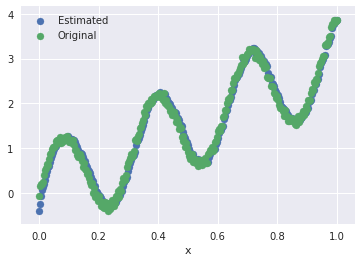

In [11]:
plt.scatter(x,y)
plt.scatter(x,d)
plt.legend(['Estimated','Original'])
plt.xlabel('x')
plt.show()

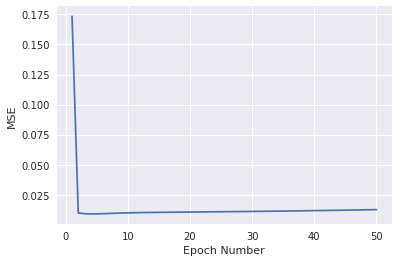

In [12]:
plt.plot(loss)
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.show()